In [ ]:
import tifffile
import zarr
from numcodecs.gzip import GZip
import numpy as np

image_paths = {
    #'/groups/cellmap/cellmap/weigela/lorena/hemibrain/hemibrain-roi1-final-labels.tif': 4,
    "/groups/cellmap/cellmap/weigela/lorena/hippocampus/roi1/hippocampus-roi1-final-labels.tif": 4,
    "/groups/cellmap/cellmap/weigela/lorena/hippocampus/roi2/hippocampus-roi2-final-labels.tif": 4,
    "/groups/cellmap/cellmap/weigela/lorena/hippocampus/roi3/hippocampus-roi3-final-labels.tif": 4,
    "/groups/cellmap/cellmap/weigela/lorena/hippocampus/roi4/hippocampus-roi4-final-labels.tif": 4,
    "/groups/cellmap/cellmap/weigela/lorena/cerebellum/SM-WT1-8x8x8nm-1300-1800-final-labels.tif": 8,
    "/groups/cellmap/cellmap/weigela/lorena/cerebellum/SM-WT1-8x8x8nm-12881-13440-final-labels.tif": 8,
}

for image_path, resolution in image_paths.items():
    current_image = tifffile.imread(image_path)
    store = zarr.N5Store(n5_path)
    zarr_root = zarr.group(store=store)
    ds = zarr_root.create_dataset(
        name=image_path.split("/")[-1].split(".tif")[0],
        data=current_image.astype(np.uint8),
        shape=current_image.shape,
        chunks=128,
        write_empty_chunks=True,
        compressor=GZip(level=6),
    )
    attributes = ds.attrs
    attributes["pixelResolution"] = {
        "dimensions": 3 * [resolution],
        "unit": "nm",
    }

: 

In [3]:
import tifffile
import zarr
from numcodecs.gzip import GZip
import numpy as np

image_paths = {
    "/groups/cellmap/cellmap/weigela/jrc_zf-cardiac-1/jrc_zf-cardiac-1-s5_labels.tif": 256
}
dataset_labels = {"heart": [1, 2]}  # , "valve": [2]}
for image_path, resolution in image_paths.items():
    for dataset, label in dataset_labels.items():
        n5_path = "/nrs/cellmap/ackermand/jrc_zf-cardiac-1/jrc_zf-cardiac-1.n5"
        current_image = tifffile.imread(image_path)
        store = zarr.N5Store(n5_path)
        zarr_root = zarr.group(store=store)
        ds = zarr_root.create_dataset(
            name=dataset,
            data=np.isin(current_image, label).astype(np.uint8),
            shape=current_image.shape,
            chunks=128,
            write_empty_chunks=True,
            compressor=GZip(level=6),
        )
        attributes = ds.attrs
        attributes["pixelResolution"] = {
            "dimensions": 3 * [resolution],
            "unit": "nm",
        }

In [2]:
import tifffile
import zarr
from numcodecs.gzip import GZip
import numpy as np

id_1 = tifffile.imread(
    "/groups/cellmap/cellmap/jonesa/liver_mem_mesh_exports/endoth_er.tif"
)
id_2 = tifffile.imread(
    "/groups/cellmap/cellmap/jonesa/liver_mem_mesh_exports/hepat_er.tif"
)
id_2[id_2 == 1] = 2

combined = id_1 + id_2

n5_path = "/nrs/cellmap/ackermand/cellmap/jrc_mus-liver.n5/blogpost.n5"
store = zarr.N5Store(n5_path)
zarr_root = zarr.group(store=store)
ds = zarr_root.create_dataset(
    name="er",
    data=combined.astype(np.uint8),
    shape=combined.shape,
    chunks=128,
    write_empty_chunks=True,
    dtype=np.uint8,
    compressor=GZip(level=6),
)
attributes = ds.attrs
attributes["pixelResolution"] = {
    "dimensions": 3 * [8],
    "unit": "nm",
}
# dataset_labels = {"heart": [1,2]}#, "valve": [2]}
# for image_path,resolution in image_paths.items():
#     for dataset,label in dataset_labels.items():
#         n5_path = "/nrs/cellmap/ackermand/jrc_zf-cardiac-1/jrc_zf-cardiac-1.n5"
#         current_image = tifffile.imread(image_path)
#         store = zarr.N5Store(n5_path)
#         zarr_root = zarr.group(store=store)
#         ds = zarr_root.create_dataset(
#             name=dataset,
#             data=np.isin(current_image,label).astype(np.uint8),
#             shape=current_image.shape,
#             chunks=128,
#             write_empty_chunks=True,
#             compressor=GZip(level=6),
#         )
#         attributes = ds.attrs
#         attributes["pixelResolution"] = {
#             "dimensions": 3 * [resolution],
#             "unit": "nm",
#         }

In [4]:
import tifffile
import zarr
from numcodecs.gzip import GZip
import numpy as np
from dask.array import from_array
from zarr.n5 import N5ChunkWrapper

image_paths = {
    "/groups/cellmap/cellmap/annotations/paintera/paintera_projects/jrc_zf-cardiac-1/jrc_zf-cardiac-1_crop281_wholecell001.n5": 8
}
dataset_labels = {"nerve_1": [1]}  # , "valve": [2]}
for image_path, resolution in image_paths.items():
    zarr_file = zarr.open(image_path, mode="r")
    current_image = zarr_file["cellmask/unique-labels/s0"]

    # zarr_file = zarr.open(image_path, mode="r")
    # current_image = zarr_file["cellmask/data/s0"]
    keys = list(current_image.chunk_store.keys())
    nonempty_keys = [
        key
        for key in keys
        if ("s0" in key and "data" in key and "attributes" not in key)
    ]
    current_image = current_image.chunk_store[nonempty_keys[0]]
    out = GZip(level=-1).decode(current_image)
    # print(current_image)
    # print(GZip.decode(current_image,current_image))
    # for dataset,label in dataset_labels.items():
    #     n5_path = "/nrs/cellmap/ackermand/jrc_zf-cardiac-1/jrc_zf-cardiac-1.n5"
    #     store = zarr.N5Store(n5_path)
    #     zarr_root = zarr.group(store=store)

    #     ds = zarr_root.create_dataset(
    #         name=dataset,
    #         data=np.isin(current_image,label).astype(np.uint8),
    #         shape=current_image.shape,
    #         chunks=128,
    #         write_empty_chunks=False,
    #         compressor=GZip(level=6),
    #     )
    #     attributes = ds.attrs
    #     attributes["pixelResolution"] = {
    #         "dimensions": 3 * [resolution],
    #         "unit": "nm",
    #     }

OSError: Not a gzipped file (b'\x00\x01')

In [5]:
import os
from numcodecs.gzip import GZip
import shutil

# s0 = '/groups/cellmap/cellmap/annotations/paintera/paintera_projects/jrc_zf-cardiac-1/jrc_zf-cardiac-1_crop281_wholecell001.n5/cellmask/data/s0'
# all_dirs = set()
# src_dir = '/nrs/cellmap/ackermand/jrc_zf-cardiac-1/jrc_zf-cardiac-1.n5/nerve_1_renumbered'
# target_dir = '/nrs/cellmap/ackermand/jrc_zf-cardiac-1/jrc_zf-cardiac-1.n5/nerve_1_renumbered_symlinks'
nerve = "nerve002"
s0 = f"/groups/cellmap/cellmap/annotations/paintera/paintera_projects/jrc_zf-cardiac-1/jrc_zf-cardiac-1_crop284_nerve002.n5/{nerve}/data/s0"
all_dirs = set()
src_dir = f"/groups/cellmap/cellmap/annotations/paintera/paintera_projects/jrc_zf-cardiac-1/converted_labels/jrc_zf-cardiac-1_crop284_nerve002_converted_ackermand_128.n5/converted_{nerve}"
target_dir = src_dir + "_symlinks"
# initially was 128,128,64 but now 128,128,128 so can divide z by two
if os.path.isdir(target_dir):
    shutil.rmtree(target_dir)
for x in os.listdir(s0):
    current_dir_x = s0 + "/" + x
    if os.path.isdir(current_dir_x):
        for y in os.listdir(current_dir_x):
            current_dir_y = current_dir_x + "/" + y
            os.makedirs(f"{target_dir}/{x}/{y}", exist_ok=True)
            for z in os.listdir(current_dir_y):
                z = str(int(z) // 2)
                symlink_target = f"{target_dir}/{x}/{y}/{z}"
                # print(os.path.getctime(f"{src_dir}/{x}/{y}/{z}")>1667435000,os.path.islink(f"{src_dir}/{x}/{y}/{z}"))
                if not os.path.exists(
                    symlink_target
                ):  # since we are halving z's we will have duplicates
                    os.symlink(f"{src_dir}/{x}/{y}/{z}", symlink_target)
                if not os.path.exists(os.readlink(symlink_target)):
                    print(symlink_target)
                # print(f"{src_dir}/{x}/{y}/{z}")
                # os.unlink(symlink_target)
                # all_dirs.add(current_dir_z)

In [57]:
import os
from numcodecs.gzip import GZip
import numpy as np
from zarr.n5 import N5ChunkWrapper
import struct

s0 = "/groups/cellmap/cellmap/annotations/paintera/paintera_projects/jrc_zf-cardiac-1/jrc_zf-cardiac-1_crop281_wholecell001.n5/cellmask/data/s0"
all_dirs = set()
src_dir = (
    "/nrs/cellmap/ackermand/jrc_zf-cardiac-1/jrc_zf-cardiac-1.n5/nerve_1_renumbered"
)
target_dir = "/nrs/cellmap/ackermand/jrc_zf-cardiac-1/jrc_zf-cardiac-1.n5/nerve_1_renumbered_symlinks"
# initially was 128,128,64 but now 128,128,128 so can divide z by two
n5_chunk_wrapper = N5ChunkWrapper(np.uint8, (128, 128, 128))


def read_header(chunk):
    num_dims = struct.unpack(">H", chunk[2:4])[0]
    shape = tuple(
        struct.unpack(">I", chunk[i : i + 4])[0] for i in range(4, num_dims * 4 + 4, 4)
    )[::-1]

    len_header = 4 + num_dims * 4

    return len_header, shape


for x in os.listdir(s0):
    current_dir_x = s0 + "/" + x
    if os.path.isdir(current_dir_x):
        for y in os.listdir(current_dir_x):
            current_dir_y = current_dir_x + "/" + y
            os.makedirs(f"{target_dir}/{x}/{y}", exist_ok=True)
            for z in os.listdir(current_dir_y):
                z = str(int(z) // 2)
                symlink_target = f"{target_dir}/{x}/{y}/{z}"
                # print(os.path.getctime(f"{src_dir}/{x}/{y}/{z}")>1667435000,os.path.islink(f"{src_dir}/{x}/{y}/{z}"))
                with open(
                    f"{src_dir}/0/0/0", mode="rb"
                ) as file:  # b is important -> binary
                    chunk = file.read()
                # type(n5_chunk_wrapper.decode(chunk))

<class 'bytes'>
<class 'bytes'>
<class 'bytes'>
<class 'bytes'>
<class 'bytes'>
<class 'bytes'>
<class 'bytes'>
<class 'bytes'>
<class 'bytes'>
<class 'bytes'>
<class 'bytes'>
<class 'bytes'>
<class 'bytes'>
<class 'bytes'>
<class 'bytes'>
<class 'bytes'>
<class 'bytes'>
<class 'bytes'>
<class 'bytes'>
<class 'bytes'>
<class 'bytes'>
<class 'bytes'>
<class 'bytes'>
<class 'bytes'>
<class 'bytes'>
<class 'bytes'>
<class 'bytes'>
<class 'bytes'>
<class 'bytes'>
<class 'bytes'>
<class 'bytes'>
<class 'bytes'>
<class 'bytes'>
<class 'bytes'>
<class 'bytes'>
<class 'bytes'>
<class 'bytes'>
<class 'bytes'>
<class 'bytes'>
<class 'bytes'>
<class 'bytes'>
<class 'bytes'>
<class 'bytes'>
<class 'bytes'>
<class 'bytes'>
<class 'bytes'>
<class 'bytes'>
<class 'bytes'>
<class 'bytes'>
<class 'bytes'>
<class 'bytes'>
<class 'bytes'>
<class 'bytes'>
<class 'bytes'>
<class 'bytes'>
<class 'bytes'>
<class 'bytes'>
<class 'bytes'>
<class 'bytes'>
<class 'bytes'>
<class 'bytes'>
<class 'bytes'>
<class '

In [18]:
/groups/scicompsoft/home/ackermand/Programming/paintera-conversion-helper/startup-scripts/spark-janelia

python convert.py 10 to-scalar -i /groups/cellmap/cellmap/annotations/paintera/paintera_projects/jrc_zf-cardiac-1/jrc_zf-cardiac-1_crop284_nerve002.n5 -I nerve002 -o /groups/cellmap/cellmap/annotations/paintera/paintera_projects/jrc_zf-cardiac-1/converted_labels/jrc_zf-cardiac-1_crop284_nerve002_converted_ackermand_128.n5 -O converted_nerve002 --block-size 128

{'/groups/cellmap/cellmap/annotations/paintera/paintera_projects/jrc_zf-cardiac-1/jrc_zf-cardiac-1_crop281_wholecell001.n5/cellmask/data/s0/110/61/278',
 '/groups/cellmap/cellmap/annotations/paintera/paintera_projects/jrc_zf-cardiac-1/jrc_zf-cardiac-1_crop281_wholecell001.n5/cellmask/data/s0/110/61/279',
 '/groups/cellmap/cellmap/annotations/paintera/paintera_projects/jrc_zf-cardiac-1/jrc_zf-cardiac-1_crop281_wholecell001.n5/cellmask/data/s0/110/61/280',
 '/groups/cellmap/cellmap/annotations/paintera/paintera_projects/jrc_zf-cardiac-1/jrc_zf-cardiac-1_crop281_wholecell001.n5/cellmask/data/s0/110/62/278',
 '/groups/cellmap/cellmap/annotations/paintera/paintera_projects/jrc_zf-cardiac-1/jrc_zf-cardiac-1_crop281_wholecell001.n5/cellmask/data/s0/110/62/279',
 '/groups/cellmap/cellmap/annotations/paintera/paintera_projects/jrc_zf-cardiac-1/jrc_zf-cardiac-1_crop281_wholecell001.n5/cellmask/data/s0/110/62/280',
 '/groups/cellmap/cellmap/annotations/paintera/paintera_projects/jrc_zf-cardiac-1/

In [3]:
import tifffile
import zarr
from numcodecs.gzip import GZip
import numpy as np
import matplotlib.pyplot as plt

current_image = tifffile.imread(
    "/groups/cellmap/cellmap/weigela/lorena/hippocampus/roi1/hippocampus-roi1-final-labels.tif"
)

In [ ]:
import tifffile
import zarr
from numcodecs.gzip import GZip
import numpy as np
import matplotlib.pyplot as plt
import zarr
import fill_voids

organelle_dict = {
    "pm": 1,
    "mito": 2,
    "er-mem": 3,
    "er-lum": 4,
    "er-pm": 5,
    "mt-out": 6,
    "mt-in": 7,
    "er": [3, 4],
    "mt": [6, 7],
    "cell": 1,
}

image_paths = {
    #'/groups/cellmap/cellmap/weigela/lorena/hemibrain/hemibrain-roi1-final-labels.tif': 4,
    "/groups/cellmap/cellmap/weigela/lorena/hippocampus/roi1/hippocampus-roi1-final-labels.tif": 4,
    "/groups/cellmap/cellmap/weigela/lorena/hippocampus/roi2/hippocampus-roi2-final-labels.tif": 4,
    "/groups/cellmap/cellmap/weigela/lorena/hippocampus/roi3/hippocampus-roi3-final-labels.tif": 4,
    "/groups/cellmap/cellmap/weigela/lorena/hippocampus/roi4/hippocampus-roi4-final-labels.tif": 4,
    "/groups/cellmap/cellmap/weigela/lorena/cerebellum/SM-WT1-8x8x8nm-1300-1800-final-labels.tif": 8,
    "/groups/cellmap/cellmap/weigela/lorena/cerebellum/SM-WT1-8x8x8nm-12881-13440-final-labels.tif": 8,
}
base_path = "/nrs/cellmap/ackermand/cellmap/er-striations/"

for image_path, resolution in image_paths.items():
    n5_path = base_path + image_path.split("/")[-1].split(".tif")[0] + ".n5"
    store = zarr.N5Store(n5_path)
    zarr_root = zarr.group(store=store, overwrite=True)

    current_image = tifffile.imread(image_path)
    for organelle, label in organelle_dict.items():
        if type(label) == list:
            organelle_image = (current_image == label[0]) | (current_image == label[1])
        else:
            organelle_image = current_image == label

        if np.any(organelle_image):
            print(n5_path, organelle)
            if organelle == "cell":
                organelle_image[0, :, :] = fill_voids.fill(organelle_image[0, :, :])
                organelle_image[-1, :, :] = fill_voids.fill(organelle_image[-1, :, :])
                organelle_image[:, 0, :] = fill_voids.fill(organelle_image[:, 0, :])
                organelle_image[:, -1, :] = fill_voids.fill(organelle_image[:, -1, :])
                organelle_image[:, :, 0] = fill_voids.fill(organelle_image[:, :, 0])
                organelle_image[:, :, -1] = fill_voids.fill(organelle_image[:, :, -1])
                organelle_image = fill_voids.fill(organelle_image)

            ds = zarr_root.create_dataset(
                name=organelle,
                data=organelle_image.astype(np.uint8),
                shape=organelle_image.shape,
                chunks=128,
                compressor=GZip(level=6),
            )
            attributes = ds.attrs
            attributes["pixelResolution"] = {
                "dimensions": 3 * [resolution],
                "unit": "nm",
            }

## Use Aubrey's tiffs for er striations

In [2]:
import tifffile
import zarr
from numcodecs.gzip import GZip
import numpy as np
import matplotlib.pyplot as plt
import zarr
import glob

base_image_paths = {
    "/groups/cellmap/cellmap/weigela/lorena/final-labels/hemibrain_roi1": 8,
    "/groups/cellmap/cellmap/weigela/lorena/final-labels/hippocampus_roi1": 8,
    "/groups/cellmap/cellmap/weigela/lorena/final-labels/hippocampus_roi2": 8,
    "/groups/cellmap/cellmap/weigela/lorena/final-labels/hippocampus_roi3": 8,
    "/groups/cellmap/cellmap/weigela/lorena/final-labels/hippocampus_roi4": 8,
    "/groups/cellmap/cellmap/weigela/lorena/final-labels/sm-wt1-1300-1800_roi1": 8,
    "/groups/cellmap/cellmap/weigela/lorena/final-labels/sm-wt1-12881-13440_roi1": 8,
}
base_output_path = "/nrs/cellmap/ackermand/cellmap/er-striations/"

for base_image_path, resolution in base_image_paths.items():
    n5_path = base_output_path + base_image_path.split("/")[-1] + ".n5"

    # this is needed since it seems before there were multiple hippocampus and one hemibrain, but now it seems reversed but that roi1s are correct
    # if "hemibrain" in n5_path and "roi1" not in n5_path:
    #     n5_path = n5_path.replace("hemibrain","hippocampus")
    # elif "hippocampus" in n5_path and "roi1" not in n5_path:
    #     n5_path = n5_path.replace("hippocampus","hemibrain")

    store = zarr.N5Store(n5_path)
    zarr_root = zarr.group(store=store, overwrite=True)
    image_paths = glob.glob(f"{base_image_path}*.tif")
    image_paths.append(f"{base_image_path}_er.tif")
    for image_path in image_paths:
        print(image_path)
        if "er.tif" in image_path:
            mem = tifffile.imread(image_path.replace("er.tif", "er-mem.tif"))
            lum = tifffile.imread(image_path.replace("er.tif", "er-lum.tif"))
            current_image = (mem > 0) | (lum > 0)
        else:
            current_image = tifffile.imread(image_path) > 0

        organelle_name = image_path.split("_")[-1].split(".tif")[0]
        ds = zarr_root.create_dataset(
            name=organelle_name,
            data=current_image.astype(np.uint8),
            shape=current_image.shape,
            chunks=128,
            compressor=GZip(level=6),
        )
        attributes = ds.attrs
        attributes["pixelResolution"] = {
            "dimensions": 3 * [resolution],
            "unit": "nm",
        }
# if np.equals(pm)
#     pm[0,:,:] = fill_voids.fill(pm[0,:,:])
#     pm[-1,:,:] = fill_voids.fill(pm[-1,:,:])
#     pm[:,0,:] = fill_voids.fill(pm[:,0,:])
#     pm[:,-1,:] = fill_voids.fill(pm[:,-1,:])
#     pm[:,:,0] = fill_voids.fill(pm[:,:,0])
#     pm[:,:,-1] = fill_voids.fill(pm[:,:,-1])
# if


# filled = fill_voids.fill(pm)

/groups/cellmap/cellmap/weigela/lorena/final-labels/hemibrain_roi1_er-pm.tif
/groups/cellmap/cellmap/weigela/lorena/final-labels/hemibrain_roi1_mito.tif
/groups/cellmap/cellmap/weigela/lorena/final-labels/hemibrain_roi1_cell.tif
/groups/cellmap/cellmap/weigela/lorena/final-labels/hemibrain_roi1_er-lum.tif
/groups/cellmap/cellmap/weigela/lorena/final-labels/hemibrain_roi1_er-mem.tif
/groups/cellmap/cellmap/weigela/lorena/final-labels/hemibrain_roi1_mt-out.tif
/groups/cellmap/cellmap/weigela/lorena/final-labels/hemibrain_roi1_pm.tif
/groups/cellmap/cellmap/weigela/lorena/final-labels/hemibrain_roi1_er.tif
/groups/cellmap/cellmap/weigela/lorena/final-labels/hippocampus_roi1_er-mem.tif
/groups/cellmap/cellmap/weigela/lorena/final-labels/hippocampus_roi1_pm.tif
/groups/cellmap/cellmap/weigela/lorena/final-labels/hippocampus_roi1_er-pm.tif
/groups/cellmap/cellmap/weigela/lorena/final-labels/hippocampus_roi1_cell.tif
/groups/cellmap/cellmap/weigela/lorena/final-labels/hippocampus_roi1_er-lum.

In [16]:
a = [1, 2, 3, 4]
a[1:-1]

[2, 3]

In [17]:
n5_path = "/nrs/cellmap/ackermand/cellmap/testcube.n5"
store = zarr.N5Store(n5_path)
zarr_root = zarr.group(store=store, overwrite=True)
unfilled = np.zeros((256, 256, 256))
unfilled[1:-1, 1:-1, 1:-1] = 1
filled = np.ones((256, 256, 256))
ds = zarr_root.create_dataset(
    name="filled",
    data=filled.astype(np.uint8),
    shape=filled.shape,
    chunks=128,
    compressor=GZip(level=6),
)
attributes = ds.attrs
attributes["pixelResolution"] = {
    "dimensions": 3 * [4],
    "unit": "nm",
}

ds = zarr_root.create_dataset(
    name="unfilled",
    data=unfilled.astype(np.uint8),
    shape=unfilled.shape,
    chunks=128,
    compressor=GZip(level=6),
)
attributes = ds.attrs
attributes["pixelResolution"] = {
    "dimensions": 3 * [4],
    "unit": "nm",
}

: 

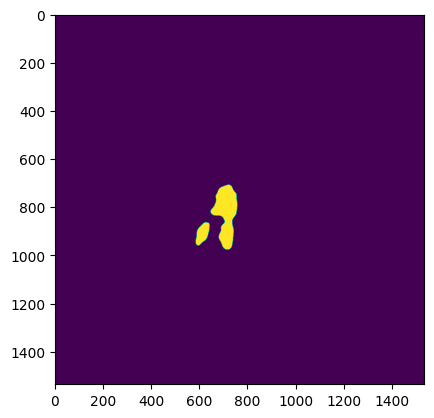

In [32]:
plt.imshow(filled[100, :, :])

## leaf-gall

In [3]:
import tifffile
import zarr
from numcodecs.gzip import GZip
import numpy as np
from scipy import ndimage


images = [
    "/groups/cellmap/cellmap/annotations/amira/jrc_22ak351-leaf-3m/plasmodemata_column.tif"
]
stores = ["/nrs/cellmap/ackermand/cellmap/leaf-gall/jrc_22ak351-leaf-3m.n5"]

resolutions = [512]
for image_name, store_name, resolution in zip(images, stores, resolutions):
    image = tifffile.imread(image_name) > 0
    store = zarr.N5Store(store_name)
    zarr_root = zarr.group(store=store)
    image = ndimage.binary_erosion(image > 0, iterations=4)
    image = image.astype(np.uint8)
    ds = zarr_root.create_dataset(
        overwrite=True,
        name=f"thinned_mask",
        data=image,
        shape=image.shape,
        chunks=64,
        write_empty_chunks=True,
        compressor=GZip(level=6),
    )
    attributes = ds.attrs
    attributes["pixelResolution"] = {
        "dimensions": 3 * [resolution],
        "unit": "nm",
    }

# thinned mask

In [ ]:
import tifffile
import zarr
from numcodecs.gzip import GZip
import numpy as np
import skimage

cell_types_dict = {1: "cells", 2: "target_cells"}
# images = ["/groups/cellmap/cellmap/annotations/amira/jrc_22ak351-leaf-3m/plasmodemata_column.tif", "/groups/cellmap/cellmap/annotations/amira/jrc_22ak351-leaf-2l/pd_2l_column.tif", "/groups/cellmap/cellmap/annotations/amira/jrc_22ak351_leaf_3r/plasmodesmata_annotation_3r.tif"]
# stores = ["/nrs/cellmap/ackermand/cellmap/leaf-gall/jrc_22ak351-leaf-3m.n5", "/nrs/cellmap/ackermand/cellmap/leaf-gall/jrc_22ak351-leaf-2l.n5", /nrs/cellmap/ackermand/cellmap/leaf-gall/jrc_22ak351-leaf-3r.n5"]

# resolutions = [512, 256]
images = [
    "/groups/cellmap/cellmap/annotations/amira/jrc_22ak351_leaf_3r/plasmodesmata_annotation_3r.tif"
]
stores = ["/nrs/cellmap/ackermand/cellmap/leaf-gall/jrc_22ak351-leaf-3r.n5"]

resolutions = [256]
for image_name, store_name, resolution in zip(images, stores, resolutions):
    image = tifffile.imread(image_name)
    store = zarr.N5Store(store_name)
    zarr_root = zarr.group(store=store)
    for label, name in cell_types_dict.items():
        if "3r" in image_name:
            label += 1
        current_image = image == label
        labeled_image, count = skimage.measure.label(
            current_image, connectivity=1, return_num=True
        )
        print(f"{labeled_image.max()} {name} cells")
        if labeled_image.max() > 2**16 - 1:
            raise Exception("lots o cells")
        if labeled_image.max() > 255:
            labeled_image = labeled_image.astype(np.uint16)
        else:
            labeled_image = labeled_image.astype(np.uint8)
        ds = zarr_root.create_dataset(
            overwrite=True,
            name=f"plasmodesmata_column_{name}",
            data=labeled_image,
            shape=labeled_image.shape,
            chunks=64,
            write_empty_chunks=True,
            compressor=GZip(level=6),
        )
        attributes = ds.attrs
        attributes["pixelResolution"] = {
            "dimensions": 3 * [resolution],
            "unit": "nm",
        }

## liver zon 1 nuclear pore

In [5]:
import tifffile
import zarr
from numcodecs.gzip import GZip
import numpy as np
import skimage

cell_types_dict = {1: "whole_nucleus", 2: "target_nucleus"}

images = [
    "/groups/cellmap/cellmap/annotations/amira/jrc_mus-liv_zon-1/crop336/test.tif"
]
stores = ["/nrs/cellmap/ackermand/cellmap/jrc_mus-liv_zon1/crop336.n5"]

resolutions = [32]
for image_name, store_name, resolution in zip(images, stores, resolutions):
    image = tifffile.imread(image_name)
    store = zarr.N5Store(store_name)
    zarr_root = zarr.group(store=store)
    for label, name in cell_types_dict.items():
        current_image = image == label
        labeled_image, count = skimage.measure.label(
            current_image, connectivity=1, return_num=True
        )
        print(f"{labeled_image.max()} {name} cells")
        if labeled_image.max() > 2**16 - 1:
            raise Exception("lots o cells")
        if labeled_image.max() > 255:
            labeled_image = labeled_image.astype(np.uint16)
        else:
            labeled_image = labeled_image.astype(np.uint8)
        ds = zarr_root.create_dataset(
            overwrite=True,
            name=f"{name}",
            data=labeled_image,
            shape=labeled_image.shape,
            chunks=64,
            write_empty_chunks=True,
            compressor=GZip(level=6),
        )
        attributes = ds.attrs
        attributes["pixelResolution"] = {
            "dimensions": 3 * [resolution],
            "unit": "nm",
        }

6 whole_nucleus cells


/groups/scicompsoft/home/ackermand/miniconda3/envs/convert-tiffs/lib/python3.9/site-packages/zarr/creation.py:226: UserWarning: ignoring keyword argument 'write_empty_chunks'
  warn('ignoring keyword argument %r' % k)


1 target_nucleus cells


In [3]:
import tifffile

image = tifffile.imread(
    "/groups/cellmap/cellmap/annotations/amira/jrc_mus-liv_zon-1/crop336/test.tif"
)

(500, 1000, 1000)

In [8]:
np.unique(image)

array([0, 2, 3], dtype=uint8)

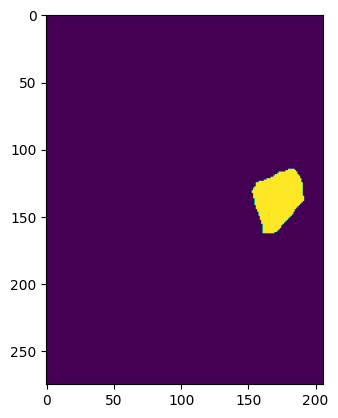

In [10]:
import matplotlib.pyplot as plt

plt.imshow(image[:, :, 100], vmax=1)

In [14]:
np.unique(image)

array([0, 1, 2], dtype=uint8)

## cellpose

In [4]:
import tifffile
import zarr
from numcodecs.gzip import GZip
import numpy as np
import skimage

images = [
    "/groups/scicompsoft/home/ackermand/Desktop/jrc_mus-liver-inverted-s5_cp_masks.tif"
]
stores = ["/nrs/cellmap/ackermand/cellmap/cellpose/jrc_mus-liver.n5"]
resolutions = [256]
for image_name, store_name, resolution in zip(images, stores, resolutions):
    image = tifffile.imread(image_name)
    store = zarr.N5Store(store_name)
    zarr_root = zarr.group(store=store)
    ds = zarr_root.create_dataset(
        overwrite=True,
        name=f"cellpose_segmentation",
        data=image,
        shape=image.shape,
        chunks=64,
        write_empty_chunks=True,
        compressor=GZip(level=6),
    )
    attributes = ds.attrs
    attributes["pixelResolution"] = {
        "dimensions": 3 * [resolution],
        "unit": "nm",
    }

/groups/scicompsoft/home/ackermand/miniconda3/envs/convert-tiffs/lib/python3.9/site-packages/zarr/creation.py:226: UserWarning: ignoring keyword argument 'write_empty_chunks'
  warn('ignoring keyword argument %r' % k)


# Convert zarrs to tiffs for Alyson

In [30]:
import zarr
import matplotlib.pyplot as plt
import numpy as np
import os
import tifffile

base_dir = "/groups/cellmap/cellmap/jonesa/livseg/"
for dir in os.listdir(base_dir):
    if ".zarr" in dir:
        data = zarr.open(f"{base_dir}/{dir}/raw", "r")
        attrs = data.attrs.asdict()
        attrs["axes"] = "ZYX"
        if dir == "middle_of_acinus_crop1.zarr":
            tifffile.imwrite(
                f'{base_dir}/{dir.split(".")[0]}.tif',
                data,
                ome=True,
                metadata=attrs,
            )
        print(dir, np.unique(data))

central_vein_crop2.zarr [0]
middle_of_acinus_crop1.zarr [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232

In [29]:
f"{base_dir}/{dir}/raw"

'/groups/cellmap/cellmap/jonesa/livseg//middle_of_acinus_crop1.tif/raw'

In [28]:
f"{base_dir}/{dir}/raw"

'/groups/cellmap/cellmap/jonesa/livseg//middle_of_acinus_crop1.tif/raw'

In [ ]:
parkg\forDavid\larger_validation_region.tif

# For Alyson: Overlapping cells

i have some liver zonation whole cell predictions that i need to correct, only thing is they contain over 4000 ids and amira only truly supports 8-bit. instead of trying to split the crop up which i tried before and twas awful, i was wondering if u knew a way to keep the ids to 256 but random across the predictions so that even tho there are duplicate ids, theyre likely not touching
https://cell-map.slack.com/archives/DTPUG12Q0/p1698679608096979

In [1]:
import os
import tifffile
import matplotlib.pyplot as plt
from funlib.segment import arrays

file_path = "/groups/cellmap/cellmap/annotations/amira/jrc_22ak351-leaf-3m/crop352/cellpose/raw_s4_inverted_cp_masks.tif"
im = tifffile.imread(file_path)

/groups/scicompsoft/home/ackermand/miniconda3/envs/convert-tiffs/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## random

In [2]:
import random
import numpy as np
from funlib.segment import arrays

old_values = np.unique(im)
old_values = [np.uint16(o) for o in old_values if o != 0]
new_values = np.random.randint(1, 255 + 1, len(old_values)).astype(np.uint16)
output_im = im.copy()
arrays.replace_values(output_im, old_values, new_values, inplace=True)
output_im = output_im.astype(np.uint8)
tifffile.imwrite(
    "/groups/cellmap/cellmap/annotations/amira/jrc_22ak351-leaf-3m/crop352/cellpose/raw_s4_inverted_cp_masks_random_relabeled.tif",
    output_im,
)

## start relabeling after each set of 255

In [3]:
old_values = np.unique(im)
old_values = [np.uint16(o) for o in old_values if o != 0]
new_values = [np.uint16(o % 255 + 1) for o in old_values]
output_im = im.copy()
arrays.replace_values(output_im, old_values, new_values, inplace=True)
output_im = output_im.astype(np.uint8)
tifffile.imwrite(
    "/groups/cellmap/cellmap/annotations/amira/jrc_22ak351-leaf-3m/crop352/cellpose/raw_s4_inverted_cp_masks_mod256_relabeled.tif",
    output_im,
)

## reorder based on zcurve

In [8]:
from functools import cmp_to_key
from skimage import measure


def cmp_zorder(lhs, rhs) -> bool:
    """Used to check if two values are in correct z-curve order.
    Based on https://github.com/google/neuroglancer/issues/272#issuecomment-752212014

    Args:
        lhs: Left hand side to compare
        rhs: Right hand side to compare

    Returns:
        bool: True if in correct z order
    """

    def less_msb(x: int, y: int) -> bool:
        return x < y and x < (x ^ y)

    # Assume lhs and rhs array-like objects of indices.
    assert len(lhs) == len(rhs)
    # Will contain the most significant dimension.
    msd = 2
    # Loop over the other dimensions.
    for dim in [1, 0]:
        # Check if the current dimension is more significant
        # by comparing the most significant bits.
        if less_msb(lhs[msd] ^ rhs[msd], lhs[dim] ^ rhs[dim]):
            msd = dim
    return lhs[msd] - rhs[msd]


props = measure.regionprops(im)
ids = list(range(1, np.amax(im) + 1))
reordered_ids, _ = zip(
    *sorted(
        zip(ids, [np.array(prop.centroid).astype(int) for prop in props]),
        key=cmp_to_key(lambda x, y: cmp_zorder(x[1], y[1])),
    )
)

# old_values = [np.uint16(o) for o in old_values if o != 0]
# new_values = [np.uint16(o % 256 + 1) for o in old_values]
# output_im = im
# arrays.replace_values(output_im, old_values, new_values, inplace=True)
# output_im = output_im.astype(np.uint8)
# tifffile.imwrite(
#     "/groups/cellmap/cellmap/ackermand/forAlyson/tmp_data/tiffs/jrc_mus-liver-zon-1/jrc_mus-liver-zon-1_s5_cp_masks_zcurveMod256.tif",
#     output_im,
# )

KeyboardInterrupt: 

## graph recoloring

In [4]:
import numpy as np
import pickle
import os
import tifffile
import matplotlib.pyplot as plt
from funlib.segment import arrays
file_path = "/groups/cellmap/cellmap/annotations/amira/jrc_22ak351-leaf-3m/crop352/cellpose/raw_s4_inverted_cp_masks.tif"
im = tifffile.imread(file_path)

padded_im = np.pad(im, [(3,), (3,), (3,)], "constant", constant_values=0)
x_shape, y_shape, z_shape = padded_im.shape
set_of_touching_ids = set()
for x_shift in range(2):
    for y_shift in range(2):
        for z_shift in range(2):
            if not (x_shift == 0 and y_shift == 0 and z_shift == 0):
                cropped_im = padded_im[x_shift:, y_shift:, z_shift:]
                shifted_im = padded_im[
                    : x_shape - x_shift, : y_shape - y_shift, : z_shape - z_shift
                ]
                indices = np.where(cropped_im != shifted_im)
                cropped_im_values = list(cropped_im[indices])
                shifted_im_values = list(shifted_im[indices])
                stacked = np.column_stack([cropped_im_values, shifted_im_values])
                unique_pairs = np.unique(stacked, axis=0)
                for cropped_im_value, shifted_im_value in unique_pairs:
                    if cropped_im_value != 0 and shifted_im_value != 0:
                        set_of_touching_ids.add(
                            (cropped_im_value, shifted_im_value)
                            if cropped_im_value < shifted_im_value
                            else (shifted_im_value, cropped_im_value)
                        )

                print(x_shift, y_shift, z_shift, len(set_of_touching_ids))

with open("set_of_touching_ids.pkl", "wb") as handle:
    pickle.dump(set_of_touching_ids, handle, protocol=pickle.HIGHEST_PROTOCOL)

import networkx as nx
from funlib.segment import arrays

G = nx.Graph()
G.add_nodes_from(list(range(1, im.max() + 1)))
G.add_edges_from(set_of_touching_ids)
coloring = nx.coloring.equitable_color(G, num_colors=255)
old_values = np.array(list(coloring.keys()), dtype=np.uint16)
new_values = np.array(list(coloring.values()), dtype=np.uint16) + 1
output_im = im.copy()
arrays.replace_values(output_im, old_values, new_values, inplace=True)
output_im = output_im.astype(np.uint8)
output_dir = "/groups/cellmap/cellmap/annotations/amira/jrc_22ak351-leaf-3m/crop352/cellpose/"
os.makedirs(output_dir,exist_ok=True)
tifffile.imwrite(
    f"{output_dir}/raw_s4_inverted_cp_masks_graph_relabeled.tif",
    output_im,
)

0 0 1 8562
0 1 0 9244
0 1 1 9688
1 0 0 10008
1 0 1 10248
1 1 0 10422
1 1 1 10586
